In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_df=pd.read_csv('data/car_data_final.csv')

In [3]:
raw_df.head()

,url,city,price,year,company,model,condition,cylinders,fuel,mileage,title_status,transmission,drive,size,type,paint_color
0,https://sfbay.craigslist.org/pen/cto/d/burling...,SF bay area,8300,2002.0,subaru,wrx,excellent,6 cylinders,gas,136000.0,clean,manual,fwd,mid-size,sedan,silver
1,https://sfbay.craigslist.org/eby/cto/d/newark-...,SF bay area,6900,2008.0,bmw,x5 3.0si,NaN,NaN,gas,170226.0,clean,automatic,NaN,NaN,NaN,NaN
2,https://sfbay.craigslist.org/sby/cto/d/san-jos...,SF bay area,4700,2008.0,toyota,scion,excellent,4 cylinders,gas,137155.0,clean,automatic,NaN,NaN,NaN,NaN
3,https://sfbay.craigslist.org/nby/cto/d/bodega-...,SF bay area,6000,1984.0,mercedes-benz,benz 300d turbo,excellent,5 cylinders,diesel,231460.0,clean,automatic,rwd,NaN,sedan,NaN
4,https://sfbay.craigslist.org/eby/ctd/d/sacrame...,SF bay area,11994,2012.0,bmw,x3,NaN,NaN,gas,112181.0,clean,automatic,NaN,NaN,SUV,NaN


In [4]:
df=raw_df.copy()

In [5]:
def pre_clean_df(raw_df):
    df=raw_df[['url', 'city', 'price', 'year', 'company', 'model', 'condition',
       'cylinders', 'fuel', 'mileage', 'title_status', 'transmission', 'drive',
       'size', 'type', 'paint_color']]
    
    df.dropna(subset=['company'], inplace=True)
    df.dropna(subset=['mileage'], inplace=True)
    
    brand_lst=['ford', 'chevrolet','toyota','honda','bmw','nissan','mercedes-benz','ram','jeep','gmc','dodge','volkswagen','lexus','hyundai',
    'subaru','audi','acura','kia','mazda','cadillac','chrysler','infiniti','volvo', 'mini', 'buick']
    df=df[df.company.str.contains('|'.join(brand_lst))]
    
    
    df.drop(df.loc[(df.year<1980)].index, axis=0, inplace=True)
    df.drop(df.loc[(df.price>90000)|(df.price<50)].index, axis=0, inplace=True)
    df.drop(df.loc[(df.year>2019)&(df.price<15000)].index, axis=0, inplace=True)
    df.drop(df.loc[(df.mileage>500000)].index, axis=0, inplace=True)
    df.drop(df.loc[(df.mileage<2000)&(df.year<2019)].index, axis=0, inplace=True)
    df.drop(df.loc[(df.company=='bmw')&(df.year<1990)&(df.price>50000)].index, axis=0, inplace=True)
    df.drop(df.loc[(df.mileage>900000)].index, axis=0, inplace=True)   
    
    df.reset_index(drop=True, inplace=True)
    return df

In [6]:
df=pre_clean_df(raw_df)

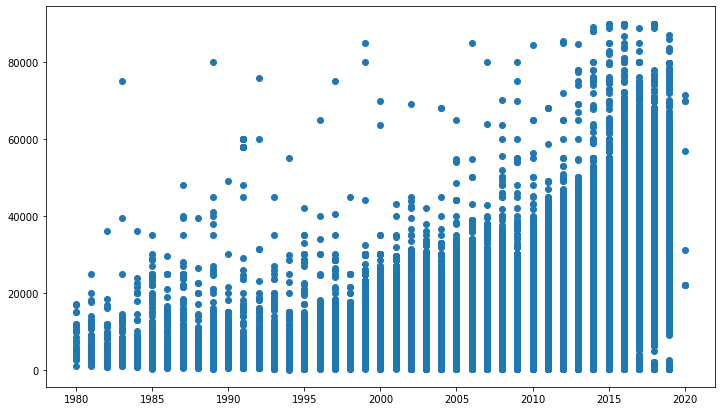

In [7]:
fig, ax = plt.subplots(1, figsize=(12,7))
ax.scatter(df.year, df.price)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y=df.pop('price')
X=df[['year', 'mileage', 'drive', 'fuel']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
result=lr.fit(X_train[['year','mileage']], y_train)

In [14]:
result.score(X_test[['year','mileage']], y_test )

0.3535848872035433

In [25]:
def readable(df):
    df['year']=df['year'].map(lambda x :(x - df['year'].mean())/df['year'].std())
    df['mileage']=df['mileage'].map(lambda x :(x - df['mileage'].mean())/df['mileage'].std())
    new_df=df.join(pd.get_dummies(df[['drive', 'fuel']]))
    new_df.drop(['drive', 'fuel'],axis=1, inplace=True)
    return new_df

In [26]:
X_tr=readable(X_train)
X_te=readable(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
result2=lr.fit(X_tr, y_train)

In [28]:
result2.score(X_te, y_test)

0.5505655301225518